In [744]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly as pl
import scipy.optimize as opt
from scipy.io import loadmat
import seaborn as sns

In [745]:
data=loadmat('machine-learning-ex5\ex5\ex5data1.mat')

In [896]:
X=data['X']
y=data['y']
Xtest=data['Xtest']
ytest=data['ytest']
Xval=data['Xval']
yval=data['yval']

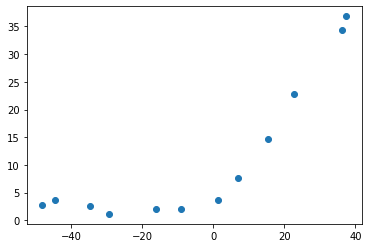

In [747]:
plt.scatter(X,y)

In [748]:
m=len(y)
ones=np.ones([m,1])
X=np.hstack((ones,X))
ones=np.ones((len(Xval),1))
Xval=np.hstack((ones,Xval))

In [749]:
theta=np.ones([2,1])

In [750]:
print(X.shape,y.shape,theta.shape)

(12, 2) (12, 1) (2, 1)


In [751]:
def costfunction(theta,X,y,lmbda):
    m=len(y)
    temp=np.sum(np.power(np.dot(X,theta)-y,2))/(2*m)
    temp=temp+(lmbda/(2*m))*np.sum(np.power(theta[1:],2))
    return temp

In [752]:
costfunction(theta,X,y,1)

303.9931922202643

In [764]:
def gradientdescent(theta,X,y,lmbda,alpha,iterations):
    m=len(y)
    for _ in range(iterations):
        theta[0]=theta[0]-((alpha/m)*np.sum(np.dot(X[:,0].T,np.dot(X,theta)-y)))
        theta[1]=theta[1]-((alpha/m)*np.sum(np.dot(X[:,1].T,np.dot(X,theta)-y))+(lmbda/m)*theta[1])
        if _ in [600,800,1000,0,1500,2000]:
            plt.scatter(X[:,1],y)
            plt.plot(X[:,1],np.dot(X,theta))
            plt.show()
    return theta

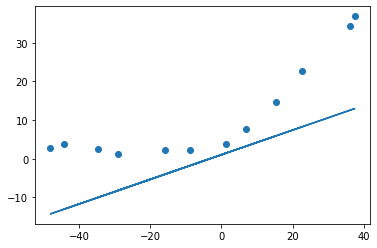

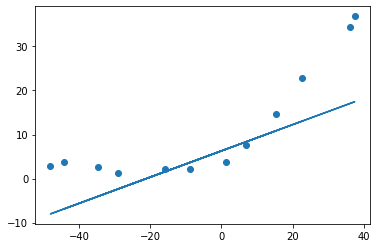

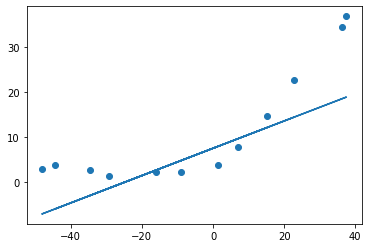

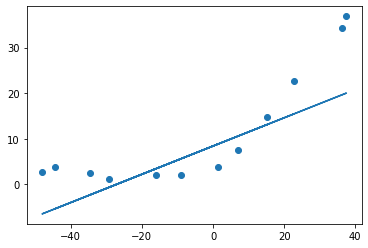

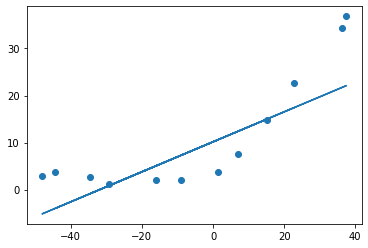

[[11.21346962]
 [ 0.32467739]]


24.5127248266065

In [772]:
theta=np.ones([2,1])
theta=gradientdescent(theta,X,y,1,0.001,2000)
print(theta)
costfunction(theta,X,y,1)

In [403]:
def lrgradient(theta,X,y,lmbda):
    temp=np.dot(X,theta)-y
    theta=(1/m)*(np.dot(X.T,temp))
    theta[1:]=theta[1:]+(lmbda/m)*theta[1:]
    return theta

In [404]:
theta=np.ones([2,1])
opt.fmin_cg(f=costfunction,x0=theta.flatten(),fprime=lrgradient,args=(X,y.flatten(),1))

         Current function value: 22.379546
         Iterations: 13
         Function evaluations: 123
         Gradient evaluations: 111


array([13.08473327,  0.36774205])

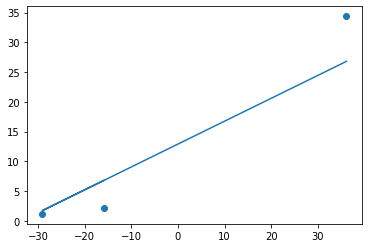

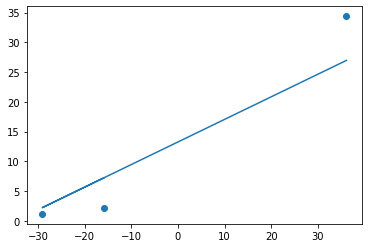

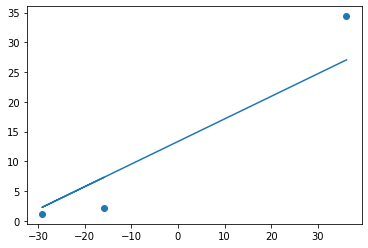

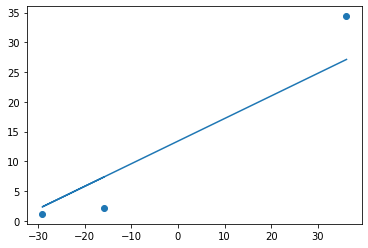

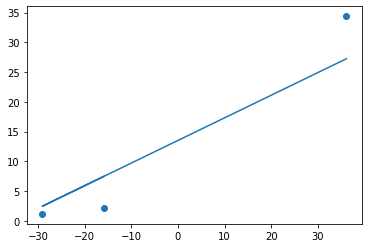

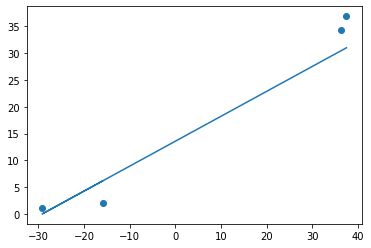

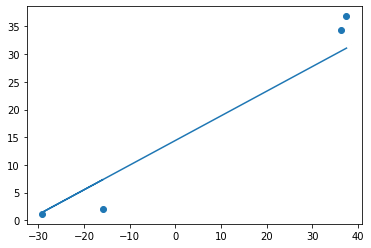

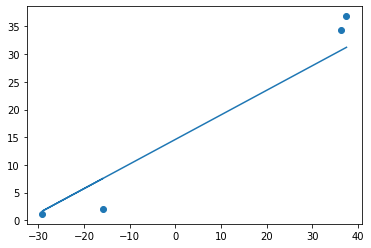

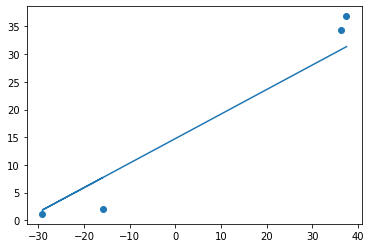

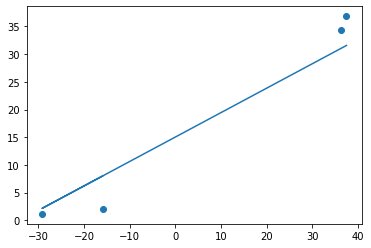

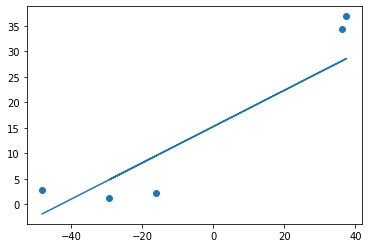

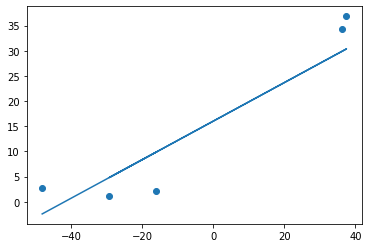

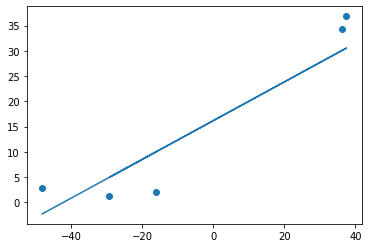

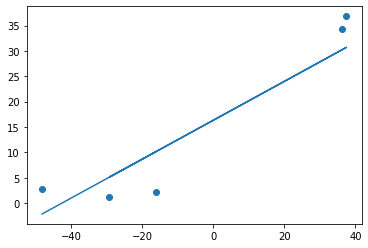

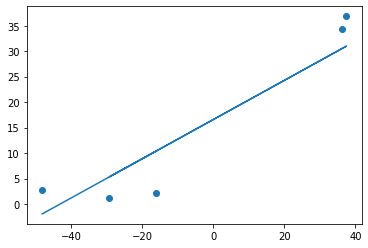

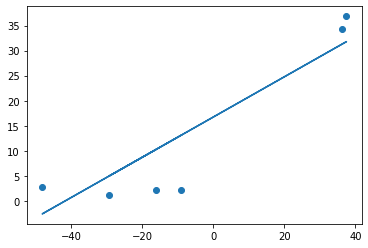

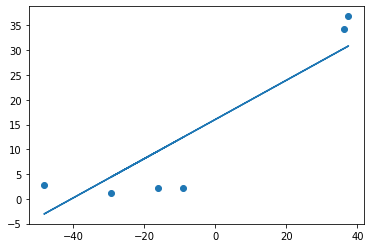

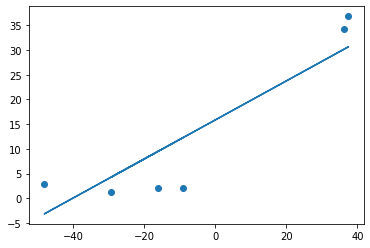

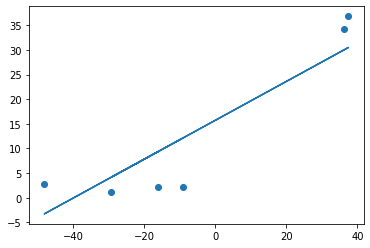

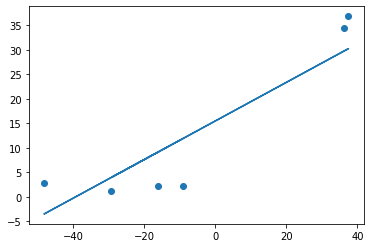

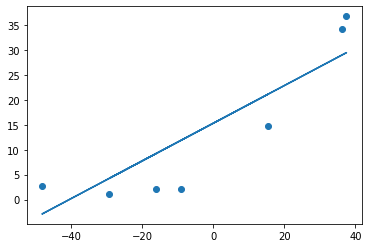

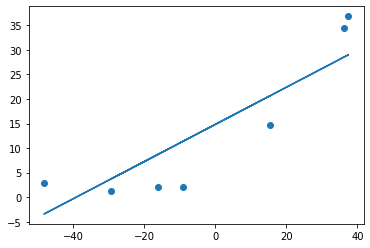

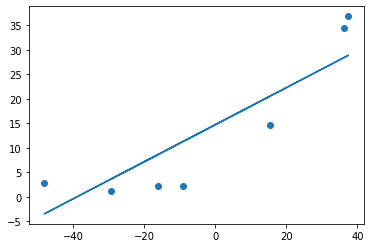

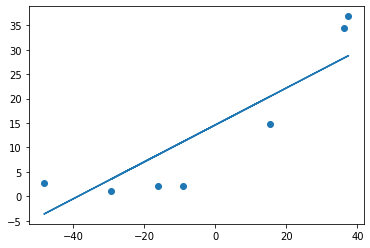

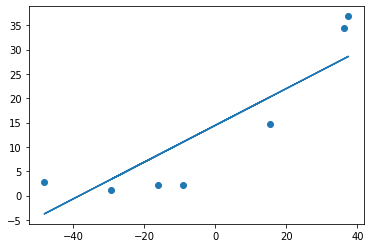

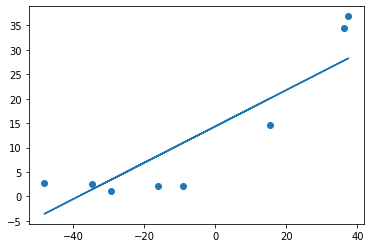

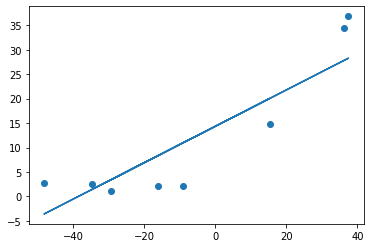

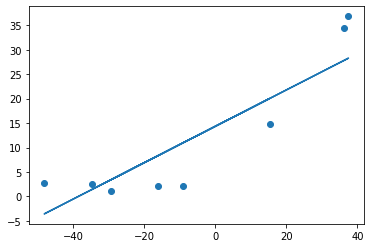

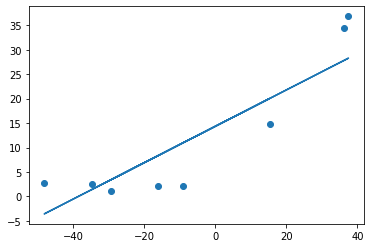

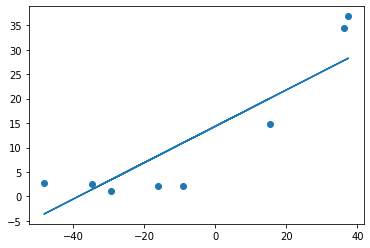

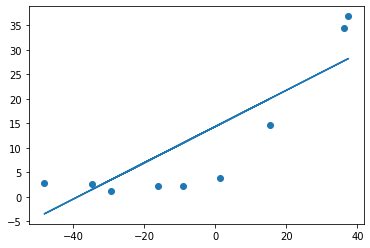

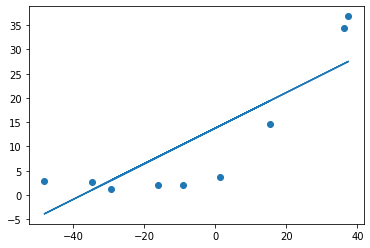

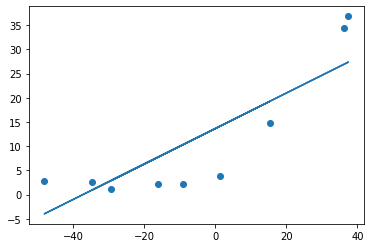

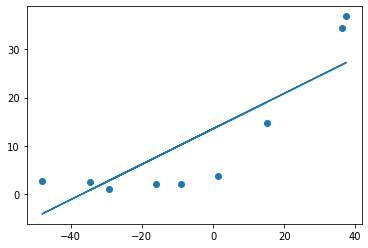

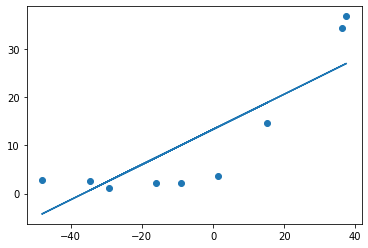

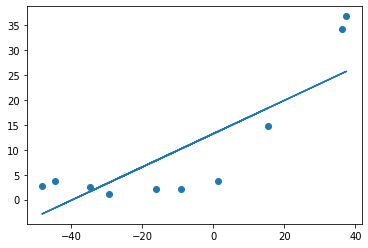

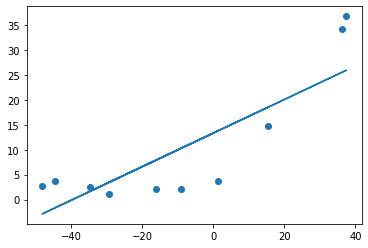

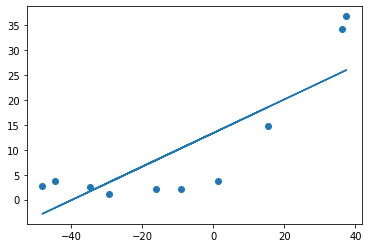

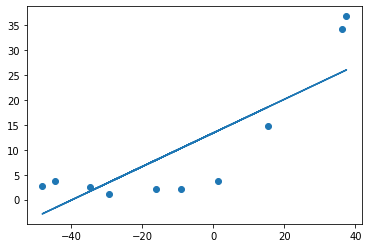

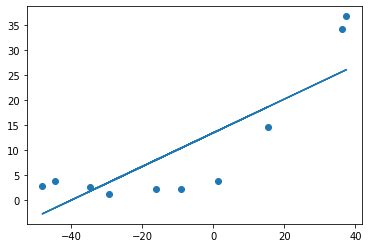

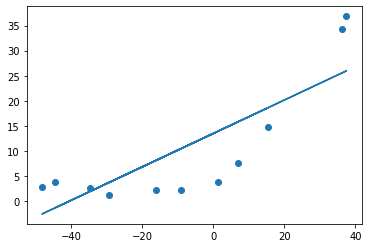

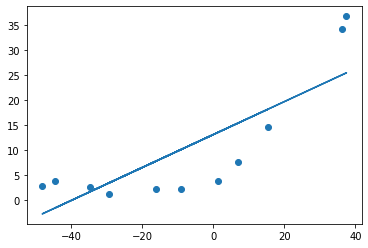

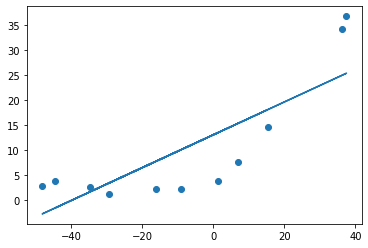

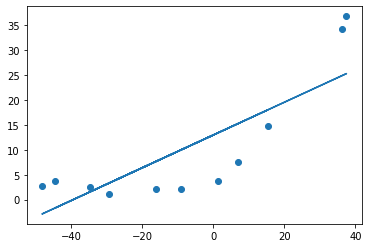

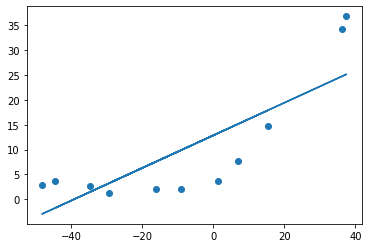

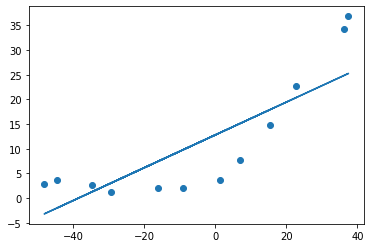

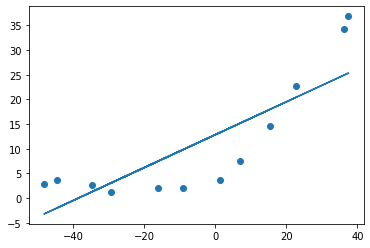

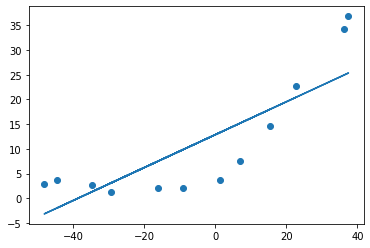

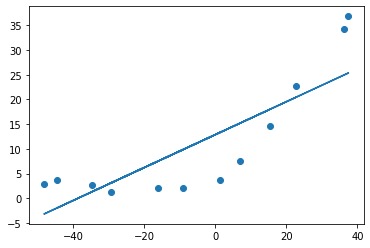

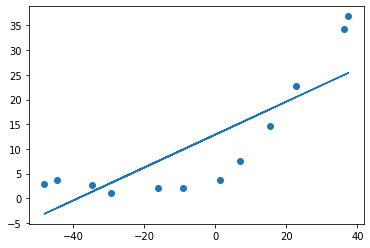

In [777]:
trainerror=np.zeros([0])
cverror=np.zeros([0])
#theta=np.ones([2,1])
for i in range(3,m+1):
    newx=X[0:i,:]
    newy=y[0:i,:]
    #trainerror=np.append(trainerror,np.array([costfunction(theta,newx,newy,0),i]).reshape(1,2),axis=1)
    theta=gradientdescent(theta,newx,newy,1,0.001,2000)
    cverror=np.append(cverror,np.array(costfunction(theta,Xval[3:13,:],yval[3:13,:],0)).reshape(1),axis=0)
    trainerror=np.append(trainerror,np.array(costfunction(theta,newx,newy,0)).reshape(1),axis=0)
    
    
    
    
    #np.array([costfunction(theta,newx,newy,0),i]).reshape(1,2)

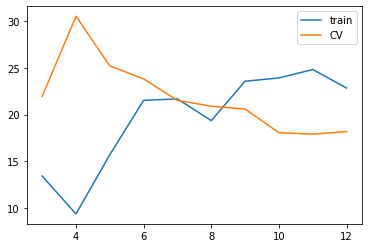

In [778]:
plt.plot(list(range(3,13)),trainerror,label='train')
plt.plot(list(range(3,13)),cverror,label='CV')
plt.legend()
plt.show()


In [910]:
def featuremapping(X,n):
        out=np.ones([12,0])
        for i in range(1,n+1):
            cal=np.power(X,i)
            out=np.hstack((out,cal))
        return out

In [915]:
n=8
newx=featuremapping(X,n)

In [916]:
newx=(newx-np.mean(newx))/(np.std(newx))

In [919]:
m,n=newx.shape
ones=np.ones((m,1))
newx=np.hstack((ones,newx))

In [943]:
theta=np.ones([n+1,1])
#theta=gradientdescent(theta,X,y,1,0.0001,2000)
costfunction(theta,newx,y,0)

138.21680788880076

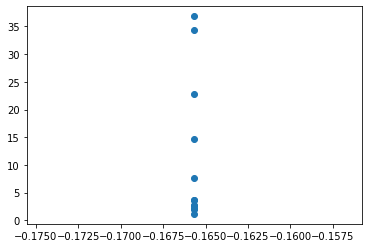

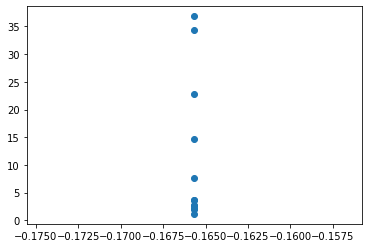

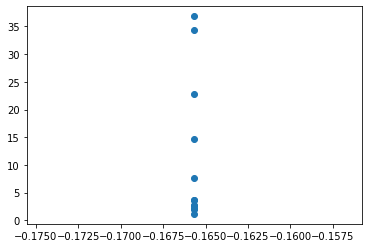

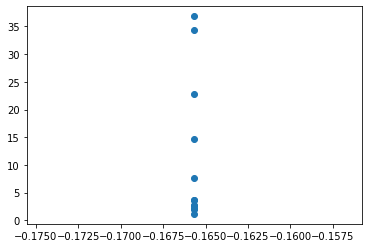

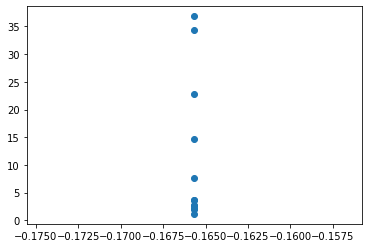

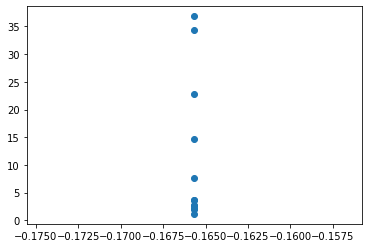

138.16827879724622

In [958]:
theta=np.ones([n+1,1])
theta=gradientdescent(theta,newx,y,1,0.1,10000)
costfunction(theta,newx,y,0)

In [952]:
def gradientdescent(theta,X,y,lmbda,alpha,iterations):
    m=len(y)
    for _ in range(iterations):
        theta=theta-((alpha/m)*np.sum(np.dot(X.T,np.dot(X,theta)-y)))
        if _ in [600,800,1000,0,1500,2000]:
            plt.scatter(X[:,1],y)
            #plt.plot(X[:,1],np.dot(X,theta))
            plt.show()
    return theta